In [1]:
# Libraries used

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from numpy.random import seed

# seed(11111)

In [2]:
# 1、Preprocessing and EDA

# Reading
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Putting on index to each dataset before split it
train = train.set_index("PassengerId")
test = test.set_index("PassengerId")

# dataframe 
df = pd.concat([train, test], axis=0, sort=False)

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [4]:
df.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [5]:
# To visualize better the columns we will transform the Sex and Embarked columns to numeric. 
# Sex column only has two categories Female and Male, Embarked column has tree labels S, C and Q.

# Sex
change = {'female':0,'male':1}
df.Sex = df.Sex.map(change)

# Embarked
change = {'S':0,'C':1,'Q':2}
df.Embarked = df.Embarked.map(change)

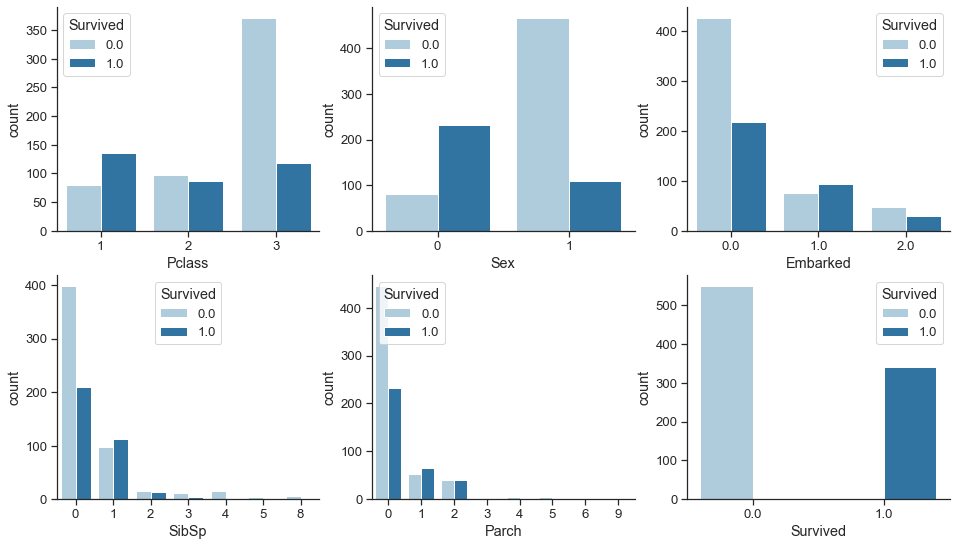

In [6]:
# The following figure show us numeric columns vs Survived column to know the behavior. 
# In the last fig (3,3) you can see that we are working with unbalanced dataset.

columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=feature, hue='Survived', palette='Paired')
    
sns.despine()

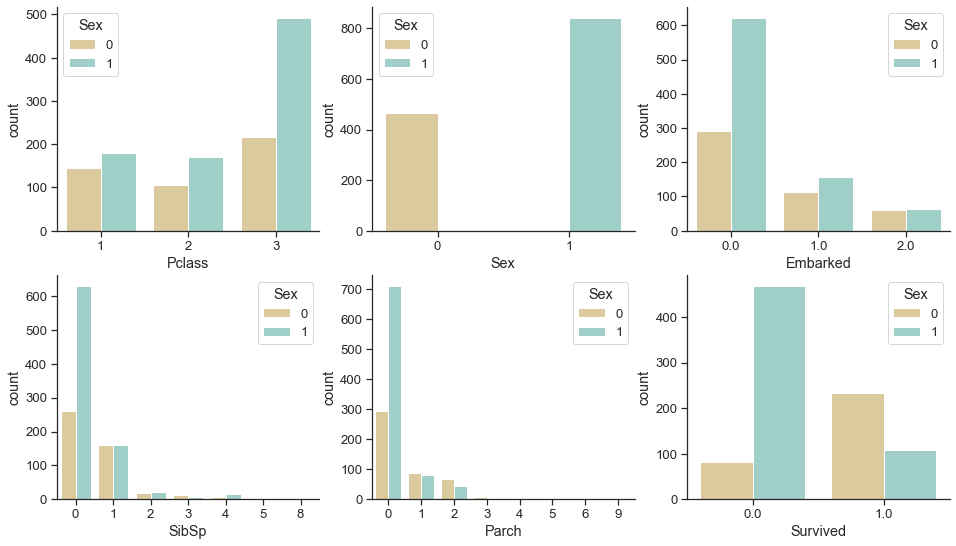

In [7]:
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=feature, hue='Sex', palette='BrBG')
    
sns.despine()

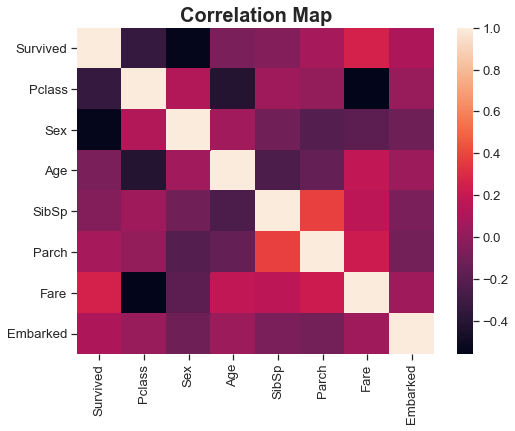

In [8]:
# The easy way to impute the missing values is with mean or median on base its correlation with other columns. 
# Below you can see the correlation beetwen variables, Pclass has a good correlation with Age,
# but I also added Sex column to impute missing values.

corr_df = df.corr()
fig, axs = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_df).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [9]:
corr_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,0.124617,-0.408106,0.060832,0.018322,-0.558629,0.037527
Sex,-0.543351,0.124617,1.000000,0.063645,-0.109609,-0.213125,-0.185523,-0.121868
Age,-0.077221,-0.408106,0.063645,1.000000,-0.243699,-0.150917,0.178740,0.048993
SibSp,-0.035322,0.060832,-0.109609,-0.243699,1.000000,0.373587,0.160238,-0.073937
Parch,0.081629,0.018322,-0.213125,-0.150917,0.373587,1.000000,0.221539,-0.095975
Fare,0.257307,-0.558629,-0.185523,0.178740,0.160238,0.221539,1.000000,0.062017
Embarked,0.108669,0.037527,-0.121868,0.048993,-0.073937,-0.095975,0.062017,1.000000


In [10]:
df.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex
1       0      37.037594
        1      41.029272
2       0      27.499223
        1      30.815380
3       0      22.185329
        1      25.962264
Name: Age, dtype: float64

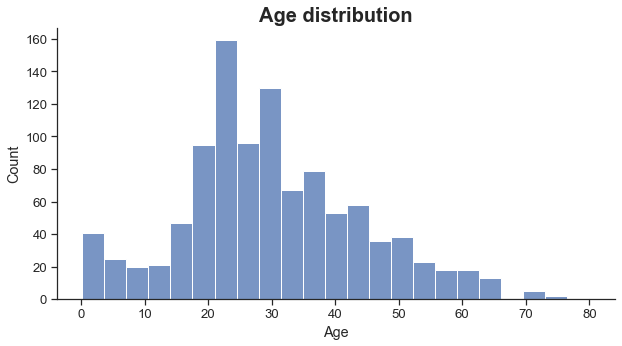

In [11]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='Age').set_title("Age distribution",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

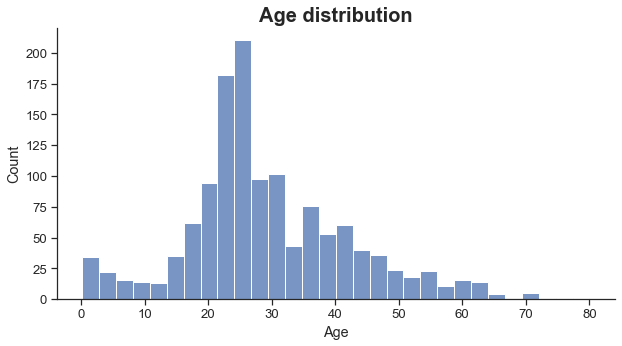

In [12]:
#Filling the missing values with mean of Pclass and Sex.
df["Age"].fillna(df.groupby(['Pclass','Sex'])['Age'].transform("mean"), inplace=True)
fig, axs = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='Age').set_title("Age distribution",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

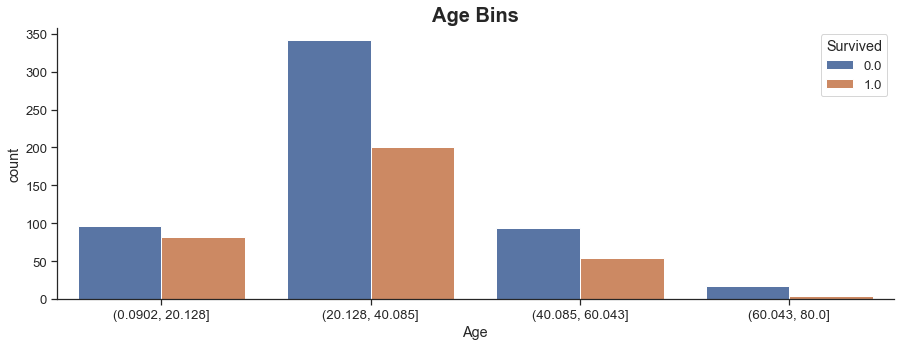

In [13]:
auxage = pd.cut(df['Age'], 4)
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxage, hue='Survived', data=df).set_title("Age Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [14]:
# converting to categorical
df['Age'] = LabelEncoder().fit_transform(auxage) 

In [15]:
pd.crosstab(df['Age'], df['Survived'])

Survived,0.0,1.0
Age,,
0,97,82
1,341,200
2,94,55
3,17,5


In [16]:
df["Fare"].fillna(df.groupby(['Pclass', 'Sex'])['Fare'].transform("median"), inplace=True)

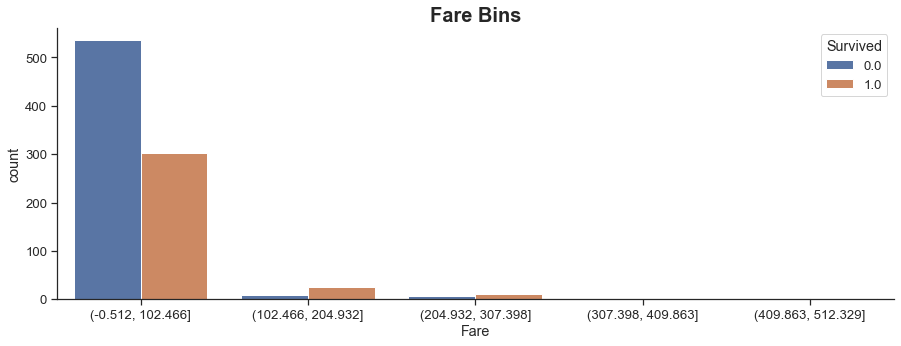

In [17]:
auxfare = pd.cut(df['Fare'],5)
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxfare, hue='Survived', data=df).set_title("Fare Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [18]:
df['Fare'] = LabelEncoder().fit_transform(auxfare) 

In [19]:
pd.crosstab(df['Fare'], df['Survived'])

Survived,0.0,1.0
Fare,,
0,535,303
1,8,25
2,6,11
3,0,3


In [20]:
# from sklearn.preprocessing import KBinsDiscretizer

# fare = df.iloc[:,8].values.reshape(-1,1) 
# est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
# df.iloc[:,8] = est.fit_transform(fare)


In [21]:
# pd.crosstab(df['Fare'], df['Survived'])

In [22]:
# Has two missing values.
print("mean of embarked",df.Embarked.median())

df.Embarked.fillna(df.Embarked.median(), inplace = True)

mean of embarked 0.0


In [23]:
print("Percentage of missing values in the Cabin column :" ,round(df.Cabin.isna().sum()/ len(df.Cabin)*100,2))
df.drop(['Cabin'], axis = 1, inplace = True)

Percentage of missing values in the Cabin column : 77.46


In [24]:
# 2、Feature Extraction
df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand = False) 

In [25]:
df['Title']

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
         ...  
1305        Mr
1306      Dona
1307        Mr
1308        Mr
1309    Master
Name: Title, Length: 1309, dtype: object

In [26]:
df.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Don           1
Sir           1
Dona          1
Jonkheer      1
Countess      1
Capt          1
Lady          1
Mme           1
Name: Title, dtype: int64

In [27]:
least_occuring = ['Rev','Dr','Major', 'Col', 'Capt','Jonkheer','Countess']

df.Title = df.Title.replace(['Ms', 'Mlle','Mme','Lady'], 'Miss')
df.Title = df.Title.replace(['Countess','Dona'], 'Mrs')
df.Title = df.Title.replace(['Don','Sir'], 'Mr')

df.Title = df.Title.replace(least_occuring,'Rare')

df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [28]:
pd.crosstab(df['Title'], df['Survived'])

Survived,0.0,1.0
Title,,
Master,17,23
Miss,55,132
Mr,437,82
Mrs,26,100
Rare,14,5


In [29]:
df['Title'] = LabelEncoder().fit_transform(df['Title']) 
df['Title']

PassengerId
1       2
2       3
3       1
4       3
5       2
       ..
1305    2
1306    3
1307    2
1308    2
1309    0
Name: Title, Length: 1309, dtype: int64

In [30]:
# I got the total number of each family adding SibSp and Parch. (1) is the same passenger.
df['FamilySize'] = df['SibSp'] + df['Parch']+1
df.drop(['SibSp','Parch'], axis = 1, inplace = True)

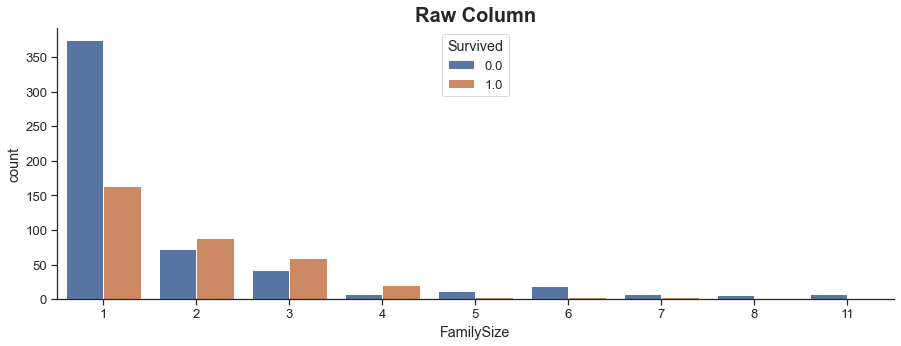

In [31]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df).set_title("Raw Column",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [32]:
# Binning FamilySize column
df.loc[ df['FamilySize'] == 1, 'FamilySize'] = 0                            # Alone
df.loc[(df['FamilySize'] > 1) & (df['FamilySize'] <= 4), 'FamilySize'] = 1  # Small Family 
df.loc[(df['FamilySize'] > 4) & (df['FamilySize'] <= 6), 'FamilySize'] = 2  # Medium Family
df.loc[df['FamilySize']  > 6, 'FamilySize'] = 3                             # Large Family 

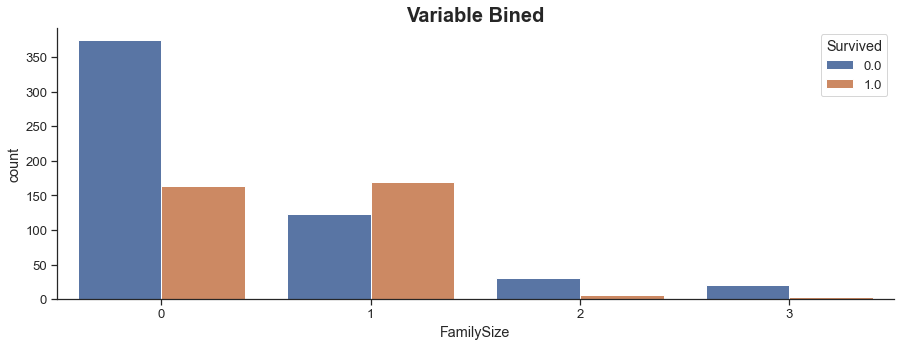

In [33]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df).set_title("Variable Bined",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [34]:
pd.crosstab(df['FamilySize'], df['Survived'])

Survived,0.0,1.0
FamilySize,,
0,374,163
1,123,169
2,31,6
3,21,4


In [35]:
df['Ticket'] = df.Ticket.str.split().apply(lambda x : 0 if x[:][-1] == 'LINE' else x[:][-1])
df['Ticket'][:20]

PassengerId
1       21171
2       17599
3     3101282
4      113803
5      373450
6      330877
7       17463
8      349909
9      347742
10     237736
11       9549
12     113783
13       2151
14     347082
15     350406
16     248706
17     382652
18     244373
19     345763
20       2649
Name: Ticket, dtype: object

In [36]:
df.Ticket = df.Ticket.values.astype('int64')

In [37]:
df['LastName'] = last= df.Name.str.extract('^(.+?),', expand = False)
df['LastName']

PassengerId
1              Braund
2             Cumings
3           Heikkinen
4            Futrelle
5               Allen
            ...      
1305          Spector
1306    Oliva y Ocana
1307          Saether
1308             Ware
1309            Peter
Name: LastName, Length: 1309, dtype: object

In [38]:
# Here, I created a new column to know if the passenger is woman a child, 
# I selected the Title parameter because most of children less than 16 years have the master title.

df['WomChi'] = ((df.Title == 0) | (df.Sex == 0))
df['WomChi']

PassengerId
1       False
2        True
3        True
4        True
5       False
        ...  
1305    False
1306     True
1307    False
1308    False
1309     True
Name: WomChi, Length: 1309, dtype: bool

In [39]:
# In this part I created three new columns FTotalCount, FSurviviedCount and FSurvivalRate, the F is of Family.
# FTotalCount uses a lambda function to count of the WomChi column on base of LastName, PClass and Ticked detect families 
# and then subtract the same passanger with a boolean process the passenger is woman or child. 
# FSurvivedCount also uses a lambda function to sum WomChi column and then with mask function filters 
# if the passenger is woman o child subtract the state of survival, 
# and the last FSurvivalRate only divide FSurvivedCount and FTotalCount.


family = df.groupby([df.LastName, df.Pclass, df.Ticket]).Survived
family.describe()

count  mean       std  min   25%  50%   75%  max
LastName      Pclass Ticket                                                  
Abbing        3      5547      1.0   0.0       NaN  0.0  0.00  0.0  0.00  0.0
Abbott        3      2673      2.0   0.5  0.707107  0.0  0.25  0.5  0.75  1.0
Abelseth      3      348122    0.0   NaN       NaN  NaN   NaN  NaN   NaN  NaN
                     348125    0.0   NaN       NaN  NaN   NaN  NaN   NaN  NaN
Abelson       2      3381      2.0   0.5  0.707107  0.0  0.25  0.5  0.75  1.0
...                            ...   ...       ...  ...   ...  ...   ...  ...
de Mulder     3      345774    1.0   1.0       NaN  1.0  1.00  1.0  1.00  1.0
de Pelsmaeker 3      345778    1.0   0.0       NaN  0.0  0.00  0.0  0.00  0.0
del Carlo     2      2167      1.0   0.0       NaN  0.0  0.00  0.0  0.00  0.0
van Billiard  3      851       1.0   0.0       NaN  0.0  0.00  0.0  0.00  0.0
van Melkebeke 3      345777    1.0   0.0       NaN  0.0  0.00  0.0  0.00  0.0

[1024 rows x 8 columns]

In [40]:
family.head()

PassengerId
1       0.0
2       1.0
3       1.0
4       1.0
5       0.0
       ... 
1305    NaN
1306    NaN
1307    NaN
1308    NaN
1309    NaN
Name: Survived, Length: 1292, dtype: float64

In [41]:
family.count()

LastName       Pclass  Ticket
Abbing         3       5547      1
Abbott         3       2673      2
Abelseth       3       348122    0
                       348125    0
Abelson        2       3381      2
                                ..
de Mulder      3       345774    1
de Pelsmaeker  3       345778    1
del Carlo      2       2167      1
van Billiard   3       851       1
van Melkebeke  3       345777    1
Name: Survived, Length: 1024, dtype: int64

In [42]:
df['FTotalCount'] = family.transform(lambda s: s[df.WomChi].fillna(0).count())
df['FTotalCount']

PassengerId
1       0.0
2       1.0
3       1.0
4       1.0
5       0.0
       ... 
1305    0.0
1306    1.0
1307    0.0
1308    0.0
1309    3.0
Name: FTotalCount, Length: 1309, dtype: float64

In [43]:
df['FTotalCount'] = df.mask(df.WomChi, (df.FTotalCount - 1), axis=0)

In [44]:
df['FTotalCount'].head(1309)

PassengerId
1         0
2         0
3         0
4         0
5         0
       ... 
1305    NaN
1306      0
1307    NaN
1308    NaN
1309      2
Name: FTotalCount, Length: 1309, dtype: object

In [45]:
df['FSurvivedCount'] = family.transform(lambda s: s[df.WomChi].fillna(0).sum())
df['FSurvivedCount']

PassengerId
1       0.0
2       1.0
3       1.0
4       1.0
5       0.0
       ... 
1305    0.0
1306    0.0
1307    0.0
1308    0.0
1309    2.0
Name: FSurvivedCount, Length: 1309, dtype: float64

In [46]:
df['FSurvivedCount'] = df.mask(df.WomChi, df.FSurvivedCount - df.Survived.fillna(0), axis=0)
df['FSurvivedCount']

PassengerId
1         0
2         0
3         0
4         0
5         0
       ... 
1305    NaN
1306      0
1307    NaN
1308    NaN
1309      2
Name: FSurvivedCount, Length: 1309, dtype: object

In [47]:
df['FSurvivalRate'] = (df.FSurvivedCount / df.FTotalCount.replace(0, np.nan))
df['FSurvivalRate']


PassengerId
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
1305    NaN
1306    NaN
1307    NaN
1308    NaN
1309      1
Name: FSurvivalRate, Length: 1309, dtype: object

In [48]:
df.isna().sum()

Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
Ticket               0
Fare                 0
Embarked             0
Title                0
FamilySize           0
LastName             0
WomChi               0
FTotalCount        245
FSurvivedCount     245
FSurvivalRate     1014
dtype: int64

In [49]:
# filling the missing values
df.FSurvivalRate.fillna(0, inplace = True)
df.FTotalCount.fillna(0, inplace = True)
df.FSurvivedCount.fillna(0, inplace = True)

In [50]:
# You can review the result Family Survival Rate with these Families Heikkinen, Braund, Rice, Andersson,
# Fortune, Asplund, Spector,Ryerson, Allison, Carter, Vander, Planke

df[df['LastName'] == "Dean"]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize,LastName,WomChi,FTotalCount,FSurvivedCount,FSurvivalRate
PassengerId,,,,,,,,,,,,,,,
94,0.0,3,"Dean, Mr. Bertram Frank",1,1,2315,0,0.0,2,1,Dean,False,0.0,0.0,0.0
789,1.0,3,"Dean, Master. Bertram Vere",1,0,2315,0,0.0,0,1,Dean,True,2.0,0.0,0.0
924,NaN,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",0,1,2315,0,0.0,3,1,Dean,True,2.0,1.0,0.5
1246,NaN,3,"Dean, Miss. Elizabeth Gladys Millvina""""",0,0,2315,0,0.0,1,1,Dean,True,2.0,1.0,0.5


In [51]:
df['PassengerId'] = df.index
df = pd.get_dummies(df, columns=['Sex','Fare','Pclass'])

In [52]:
df

,Survived,Name,Age,Ticket,Embarked,Title,FamilySize,LastName,WomChi,FTotalCount,...,PassengerId,Sex_0,Sex_1,Fare_0,Fare_1,Fare_2,Fare_3,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,"Braund, Mr. Owen Harris",1,21171,0.0,2,1,Braund,False,0.0,...,1,0,1,1,0,0,0,0,0,1
2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,17599,1.0,3,1,Cumings,True,0.0,...,2,1,0,1,0,0,0,1,0,0
3,1.0,"Heikkinen, Miss. Laina",1,3101282,0.0,1,0,Heikkinen,True,0.0,...,3,1,0,1,0,0,0,0,0,1
4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,113803,0.0,3,1,Futrelle,True,0.0,...,4,1,0,1,0,0,0,1,0,0
5,0.0,"Allen, Mr. William Henry",1,373450,0.0,2,0,Allen,False,0.0,...,5,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,"Spector, Mr. Woolf",1,3236,0.0,2,0,Spector,False,0.0,...,1305,0,1,1,0,0,0,0,0,1
1306,NaN,"Oliva y Ocana, Dona. Fermina",1,17758,1.0,3,0,Oliva y Ocana,True,0.0,...,1306,1,0,0,1,0,0,1,0,0
1307,NaN,"Saether, Mr. Simon Sivertsen",1,3101262,0.0,2,0,Saether,False,0.0,...,1307,0,1,1,0,0,0,0,0,1


In [53]:
df.drop(['Name','LastName','WomChi','FTotalCount','FSurvivedCount','Embarked','Title'], axis = 1, inplace = True)
df.columns

Index(['Survived', 'Age', 'Ticket', 'FamilySize', 'FSurvivalRate',
       'PassengerId', 'Sex_0', 'Sex_1', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [54]:
df

,Survived,Age,Ticket,FamilySize,FSurvivalRate,PassengerId,Sex_0,Sex_1,Fare_0,Fare_1,Fare_2,Fare_3,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,
1,0.0,1,21171,1,0.0,1,0,1,1,0,0,0,0,0,1
2,1.0,1,17599,1,0.0,2,1,0,1,0,0,0,1,0,0
3,1.0,1,3101282,0,0.0,3,1,0,1,0,0,0,0,0,1
4,1.0,1,113803,1,0.0,4,1,0,1,0,0,0,1,0,0
5,0.0,1,373450,0,0.0,5,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,1,3236,0,0.0,1305,0,1,1,0,0,0,0,0,1
1306,NaN,1,17758,0,0.0,1306,1,0,0,1,0,0,1,0,0
1307,NaN,1,3101262,0,0.0,1307,0,1,1,0,0,0,0,0,1


In [55]:
# I splitted df to train and test
train, test = df.loc[train.index], df.loc[test.index]

X_train = train.drop(['PassengerId','Survived'], axis = 1)
Y_train = train["Survived"]
train_names = X_train.columns

X_test = test.drop(['PassengerId','Survived'], axis = 1)

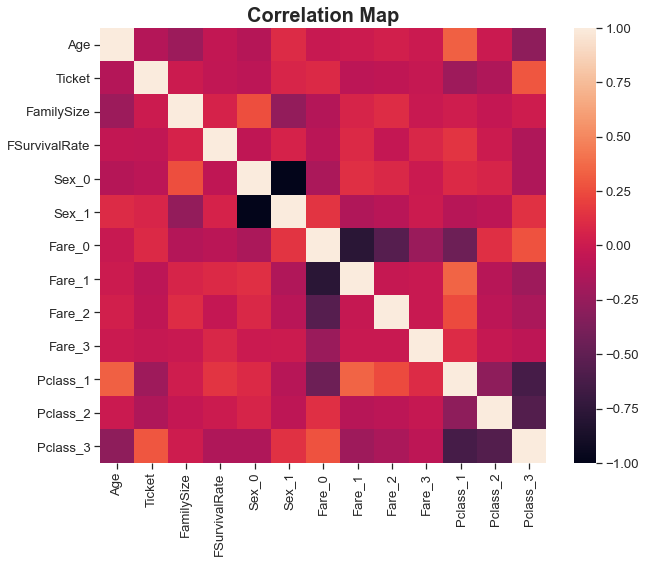

In [56]:
corr_train = X_train.corr()
fig, axs = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_train).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
plt.show()

In [57]:
# Scaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [58]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_predDT = decision_tree.predict(X_test)

print("Accuracy of the model: ",round(decision_tree.score(X_train, Y_train) * 100, 2))

Accuracy of the model:  99.89


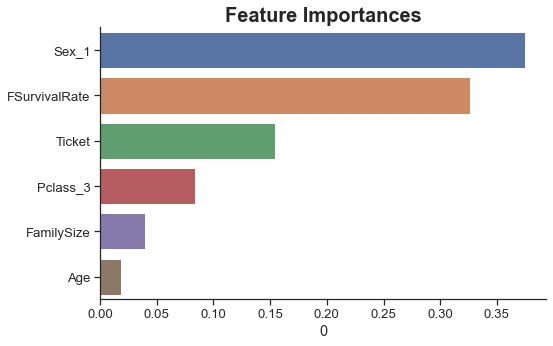

In [59]:
importances = pd.DataFrame(decision_tree.feature_importances_, index = train_names)
importances.sort_values(by = 0, inplace=True, ascending = False)
importances = importances.iloc[0:6,:] 

plt.figure(figsize=(8, 5)) 
sns.barplot(x=0, y=importances.index, data=importances,palette="deep").set_title("Feature Importances",
                                                                                 fontdict= { 'fontsize': 20,
                                                                                            'fontweight':'bold'});
sns.despine()

In [60]:
submit = pd.DataFrame({"PassengerId":test.PassengerId, 'Survived':Y_predDT.astype(int).ravel()})
# submit.to_csv("submissionJavier_Vallejos.csv",index = False)

In [61]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
cross_val_score(RFC(n_estimators=10,random_state=0),X_train,Y_train,cv=5).mean()

0.9304312346996422

In [62]:

cross_val_score(DecisionTreeClassifier(),X_train,Y_train,cv=5).mean()

0.9281526583390873

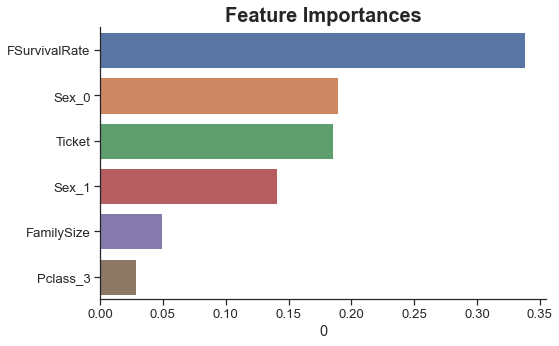

In [63]:

importances = pd.DataFrame(RFC(n_estimators=10,random_state=0).fit(X_train, Y_train).feature_importances_, index = train_names)
importances.sort_values(by = 0, inplace=True, ascending = False)
importances = importances.iloc[0:6,:] 

plt.figure(figsize=(8, 5)) 
sns.barplot(x=0, y=importances.index, data=importances,palette="deep").set_title("Feature Importances",
                                                                                 fontdict= { 'fontsize': 20,
                                                                                            'fontweight':'bold'});
sns.despine()